## Comparison between Direct Path and Evolutionary Algorithm

In [13]:
import matplotlib.pyplot as plt
import RNA

import rna_structure as rs
import evolution as ev
import path_finding as pf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def plot_energy_profiles(seq, start_struct, end_struct, evolutionary_path, direct_path):
    """
    Plot energy profiles for both evolutionary and direct paths
    
    Args:
        seq: RNA sequence
        start_struct: Starting structure in dot-bracket notation
        end_struct: Target structure in dot-bracket notation
        evolutionary_path: List of structures from evolutionary algorithm
        direct_path: List of structures from direct path
    """
    fc = RNA.fold_compound(seq)
    
    # Calculate energies for evolutionary path
    evo_energies = [fc.eval_structure(struct) for struct in evolutionary_path]
    evo_steps = range(len(evo_energies))
    
    # Calculate energies for direct path
    direct_energies = [fc.eval_structure(struct) for struct in direct_path]
    direct_steps = range(len(direct_energies))
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(evo_steps, evo_energies, 'b-', label='Evolutionary Path')
    plt.plot(direct_steps, direct_energies, 'r--', label='Direct Path')
    
    # Add labels and title
    plt.xlabel('Step')
    plt.ylabel('Energy (kcal/mol)')
    plt.title('Energy Profiles Comparison')
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()
    
    # Print some statistics
    print(f"Evolutionary Path:")
    print(f"- Initial energy: {evo_energies[0]:.2f} kcal/mol")
    print(f"- Final energy: {evo_energies[-1]:.2f} kcal/mol")
    print(f"- Maximum energy: {max(evo_energies):.2f} kcal/mol")
    print(f"- Energy barrier: {max(evo_energies) - evo_energies[0]:.2f} kcal/mol")
    print(f"- Path length: {len(evo_energies)} steps")
    
    print(f"\nDirect Path:")
    print(f"- Initial energy: {direct_energies[0]:.2f} kcal/mol")
    print(f"- Final energy: {direct_energies[-1]:.2f} kcal/mol")
    print(f"- Maximum energy: {max(direct_energies):.2f} kcal/mol")
    print(f"- Energy barrier: {max(direct_energies) - direct_energies[0]:.2f} kcal/mol")
    print(f"- Path length: {len(direct_energies)} steps")

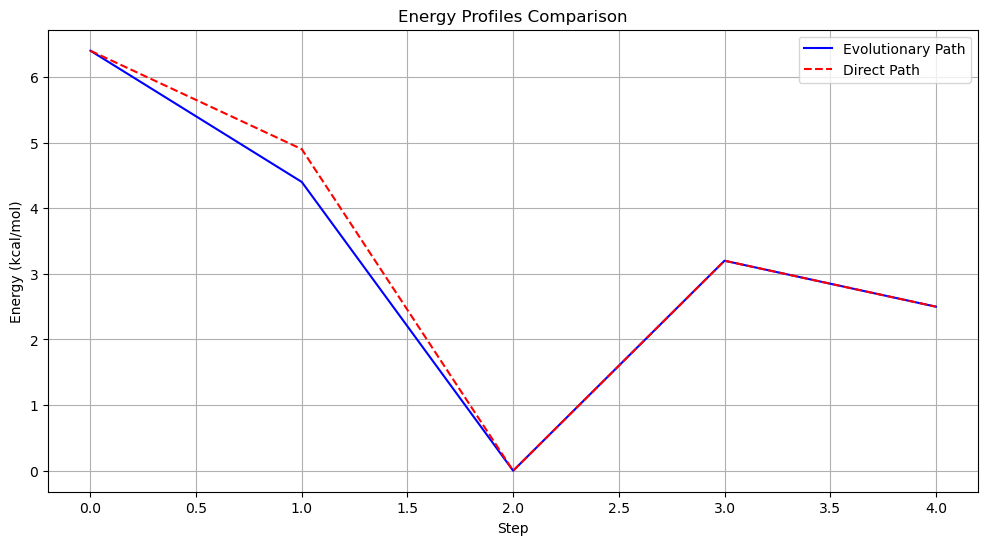

Evolutionary Path:
- Initial energy: 6.40 kcal/mol
- Final energy: 2.50 kcal/mol
- Maximum energy: 6.40 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 5 steps

Direct Path:
- Initial energy: 6.40 kcal/mol
- Final energy: 2.50 kcal/mol
- Maximum energy: 6.40 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 5 steps


In [15]:
# Example usage
seq = "GGGGAAACUCC"
start_struct = "(..(...)..)"
end_struct = "...((...))."

# Get direct path
start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=100, max_steps=100)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, start_struct, end_struct, evolutionary_path, direct_path)


Generation 10:
{'structure': '....................(((.......)))............(((((((.......)))))))................', 'distance': 22, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '................................................(.............)...................', '...............................................((.............))..................', '..............................................(((.............))).................', '.............................................((((.............))))................', '.............................................(((((...........)))))................', '.............................................((((((.........))))))................', '....................(...........)............((((((.........))))))................', '....................(...........)............(((((((.......)))))))................', '....................((.........))............(((((((.......))))

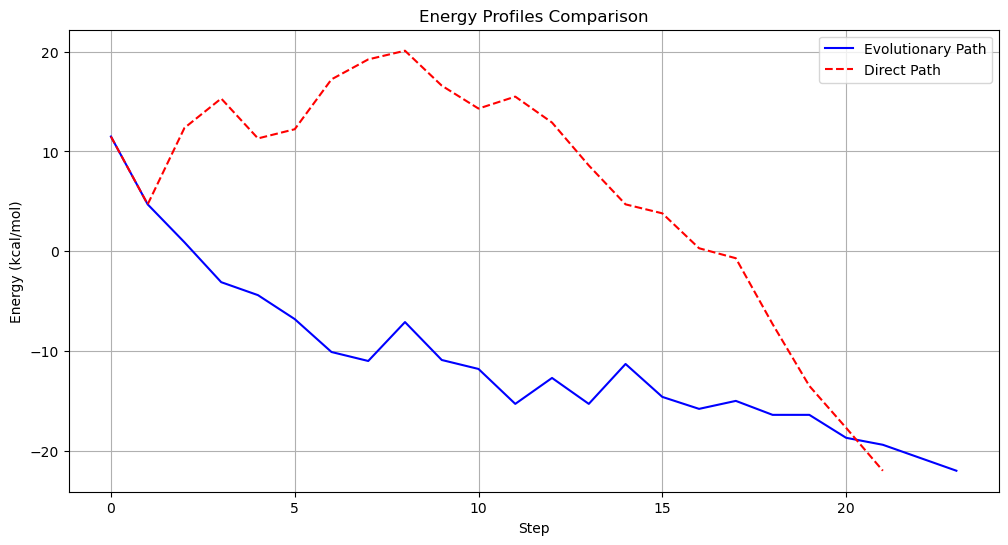

Evolutionary Path:
- Initial energy: 11.50 kcal/mol
- Final energy: -22.00 kcal/mol
- Maximum energy: 11.50 kcal/mol
- Energy barrier: 0.00 kcal/mol
- Path length: 24 steps

Direct Path:
- Initial energy: 11.50 kcal/mol
- Final energy: -22.00 kcal/mol
- Maximum energy: 20.10 kcal/mol
- Energy barrier: 8.60 kcal/mol
- Path length: 22 steps


In [16]:
# Example usage
seq = "ACACGACCUCAUAUAAUCUUGGGAAUAUGGCCCAUAAGUUUCUACCCGGCAACCGUAAAUUGCCGGACUAUGCAGGGAAGUG"
start_struct = "......................(....................)....(.............)..................."
end_struct = ".(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))"  # target structure

# Get direct path
start_structure = rs.RNAStructure(seq, structure=start_struct)
end_structure = rs.RNAStructure(seq, structure=end_struct)
direct_path = pf.find_direct_path(start_structure, end_structure)
direct_path = [struct.to_dotbracket() for struct in direct_path]

# Get evolutionary path
best, steps = ev.best_folding(seq, start_struct, end_struct, N=200, max_steps=50)
evolutionary_path = best['path']

# Plot the comparison
plot_energy_profiles(seq, start_struct, end_struct, evolutionary_path, direct_path)